In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split, StratifiedKFold, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
%pylab inline
figsize(8, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('../../data/telecom_churn.csv')

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.shape

(3333, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


Каждая строка представляет собой одного клиента - это **объект** исследования.  
Столбцы - **признаки** объекта.


Описание признаков объекта:  
**State** - Буквенный код штата, номинальный признак  
**Account length** - Общее время, в течение которого клиент обслуживается компанией, количественный признак  
**Area code** - Префикс номера телефона, количественный признак   
**International plan** - Международный роуминг, бинарный признак (подключен/не подключен)  
**Voice mail plan** - Голосовая почта, бинарный признак (подключена/не подключена)  
**Number vmail messages** - Количество голосовых сообщений, количественный признак  
**Total day minutes** - Общая длительность разговоров днем, количественный признак  
**Total day calls** - Общее количество звонков днем, количественный признак  
**Total day charge** - Общая сумма оплаты за услуги днем, количественный признак  
**Total eve minutes** - Общая длительность разговоров вечером, количественный признак  
**Total eve calls** - Общее количество звонков вечером, количественный признак  
**Total eve charge** - Общая сумма оплаты за услуги вечером, количественный признак  
**Total night minutes** - Общая длительность разговоров ночью, количественный признак  
**Total night calls** - Общее количество звонков ночью, количественный признак  
**Total night charge** - Общая сумма оплаты за услуги ночью, количественный признак  
**Total intl minutes** - Общая длительность международных разговоров, количественный признак  
**Total intl calls** - Общее количество  международных разговоров, количественный признак  
**Total intl charge** -  Общая сумма оплаты за международные разговоры, количественный   признак  
**Customer service calls** - Количество обращений в сервисный центр, количественный признак 
  
Целевая переменная: **Churn** - Признак оттока, бинарный признак (1 - потеря клиента, то есть отток)  

In [7]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
enc = LabelEncoder()
data['State'] = enc.fit_transform(data['State'])

In [10]:
data['State'].head()

0    16
1    35
2    31
3    35
4    36
Name: State, dtype: int64

In [17]:
data['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [16]:
data['Voice mail plan'].head()

0    Yes
1    Yes
2     No
3     No
4     No
Name: Voice mail plan, dtype: object

In [18]:
data['International plan'] = data['International plan'].apply(
    lambda plan: 1 if plan == "Yes" else 0)
data['Voice mail plan'] = data['Voice mail plan'].apply(
    lambda plan: 1 if plan == "Yes" else 0)

In [36]:
forest = RandomForestClassifier(n_estimators=100,
                               random_state=42,
                               n_jobs=-1, verbose=True,
                               oob_score=True,
                               class_weight='balanced')
forest.fit(data.drop('Churn', axis=1), data['Churn'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=True,
            warm_start=False)

In [37]:
forest.oob_score_

0.9474947494749475

In [32]:
importances_df = pd.DataFrame(forest.feature_importances_, 
             columns=['Importance'], 
             index=data.drop('Churn', axis=1).columns).\
    sort_values(by='Importance', ascending=False)

In [46]:
importances_df

,Importance
Total day minutes,0.152208
Total day charge,0.125234
Customer service calls,0.123548
International plan,0.090128
Total eve charge,0.069921
Total eve minutes,0.066434
Total intl calls,0.046237
Total intl charge,0.044744
Voice mail plan,0.029854
Total night calls,0.029788


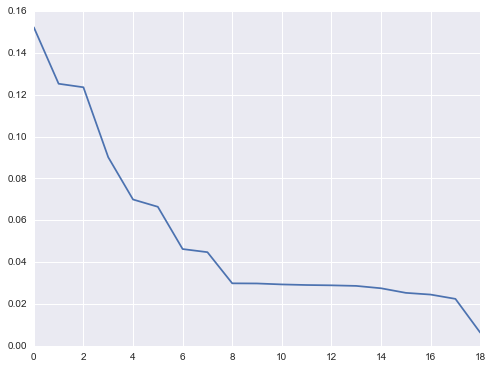

In [33]:
plot(range(importances_df.shape[0]),
    importances_df['Importance'])

In [30]:
pd.crosstab(data['Churn'], data['International plan'])

International plan,0,1
Churn,,
False,2664,186
True,346,137


In [31]:
data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [42]:
predictors = list(set(data.columns) - set(['State',
                                      'International plan',
                                     'Voice mail plan']))

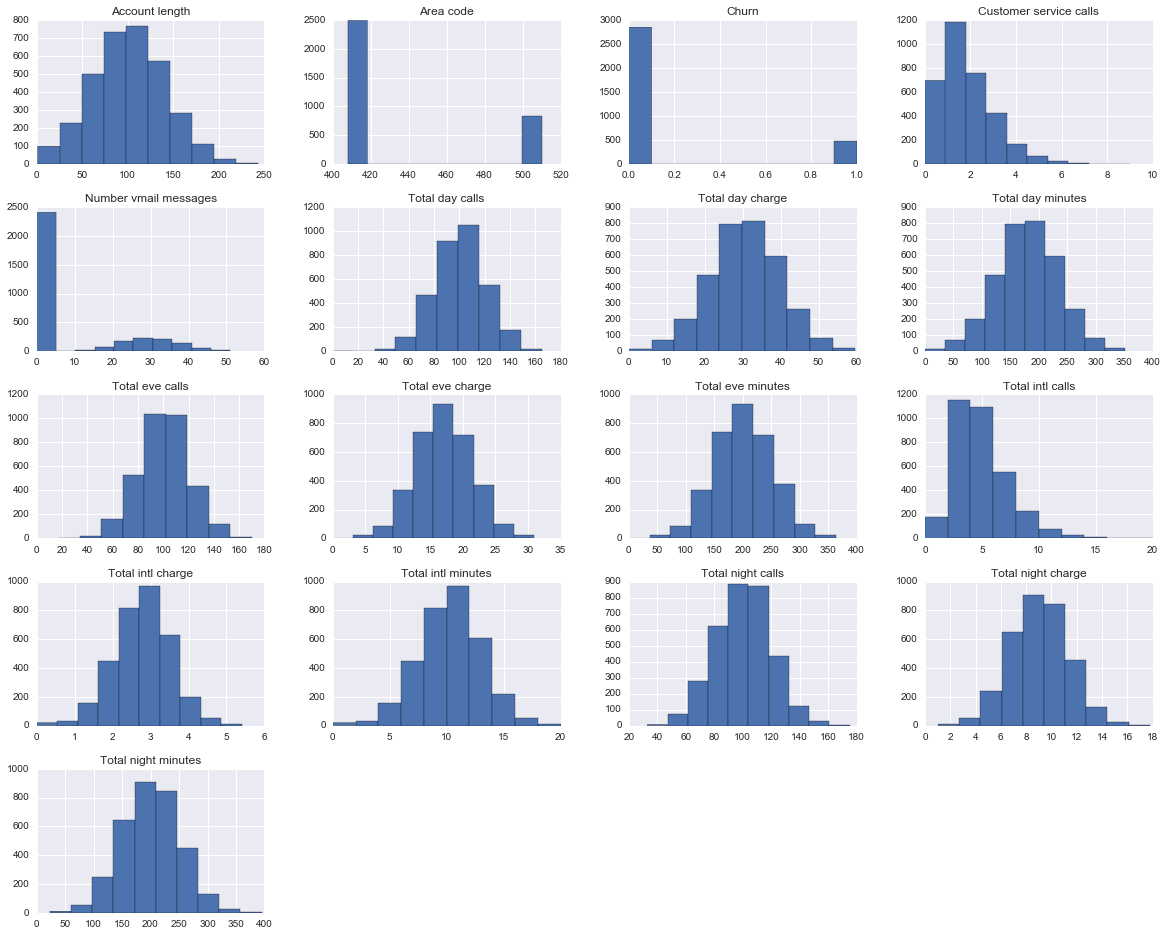

In [45]:
figsize(20, 16)
plots = data[predictors].hist()

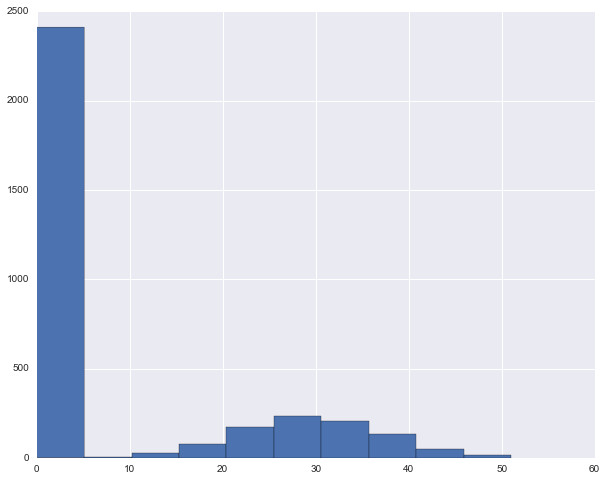

In [48]:
data['Number vmail messages'].hist(figsize=(10,8))

In [51]:
data['No voice messages'] = \
    (data['Number vmail messages'] == 0).astype('int')

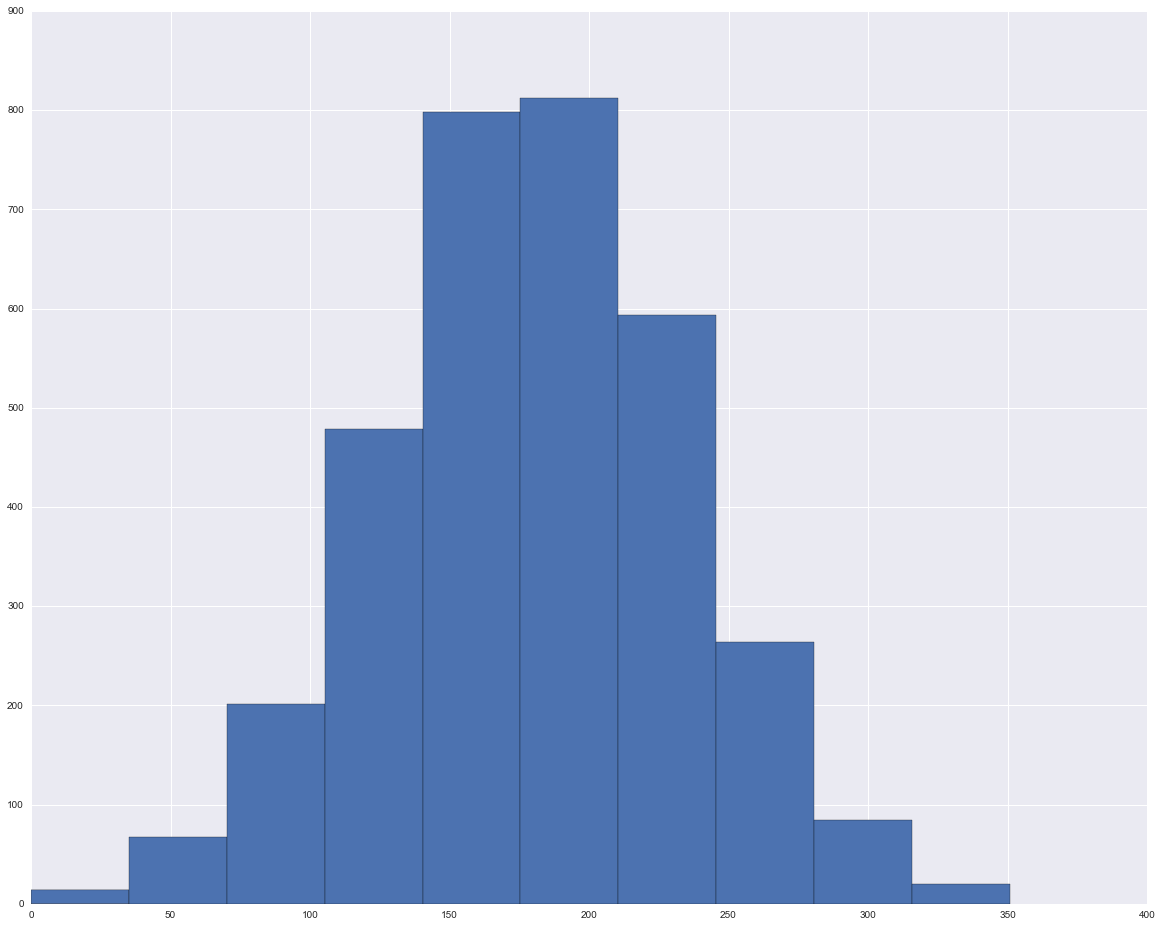

In [52]:
data['Total day minutes'].hist()

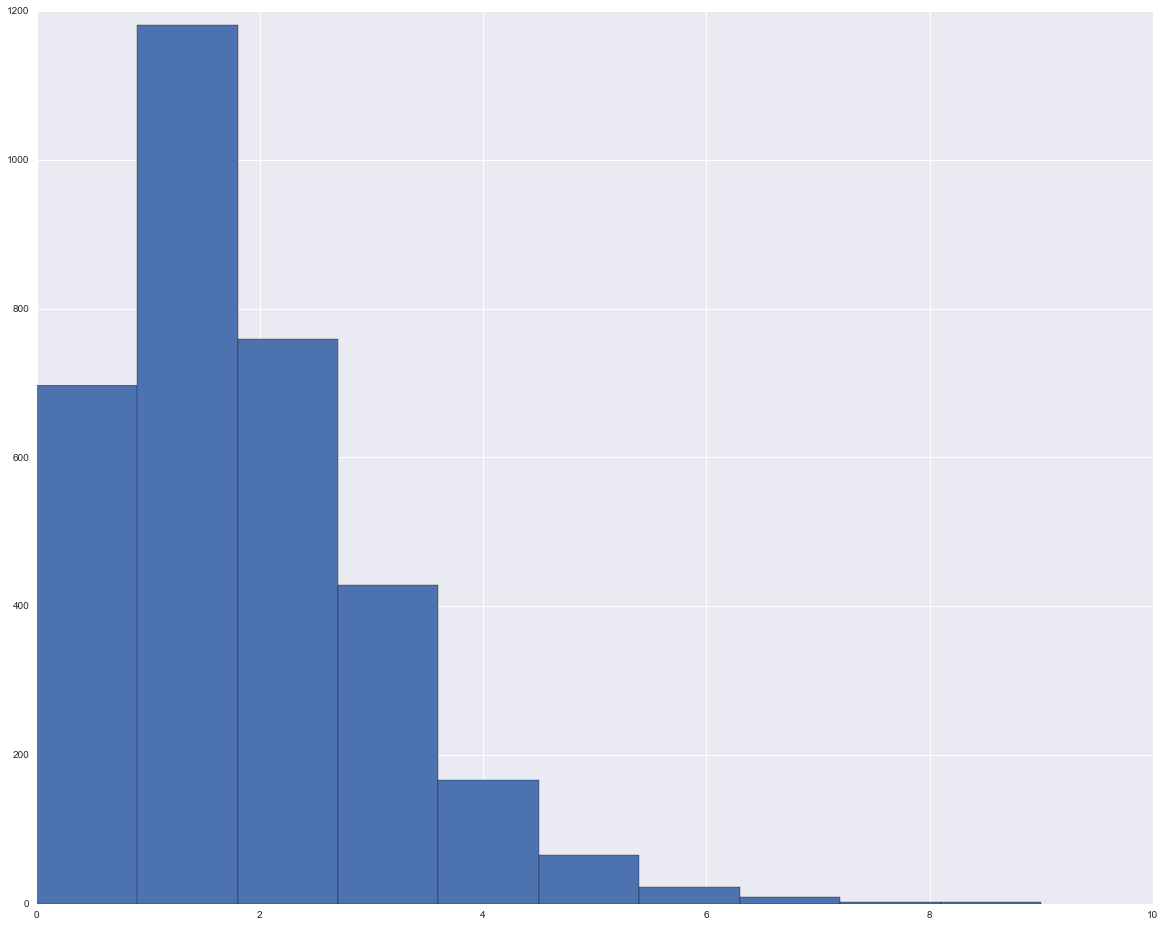

In [53]:
data['Customer service calls'].hist()

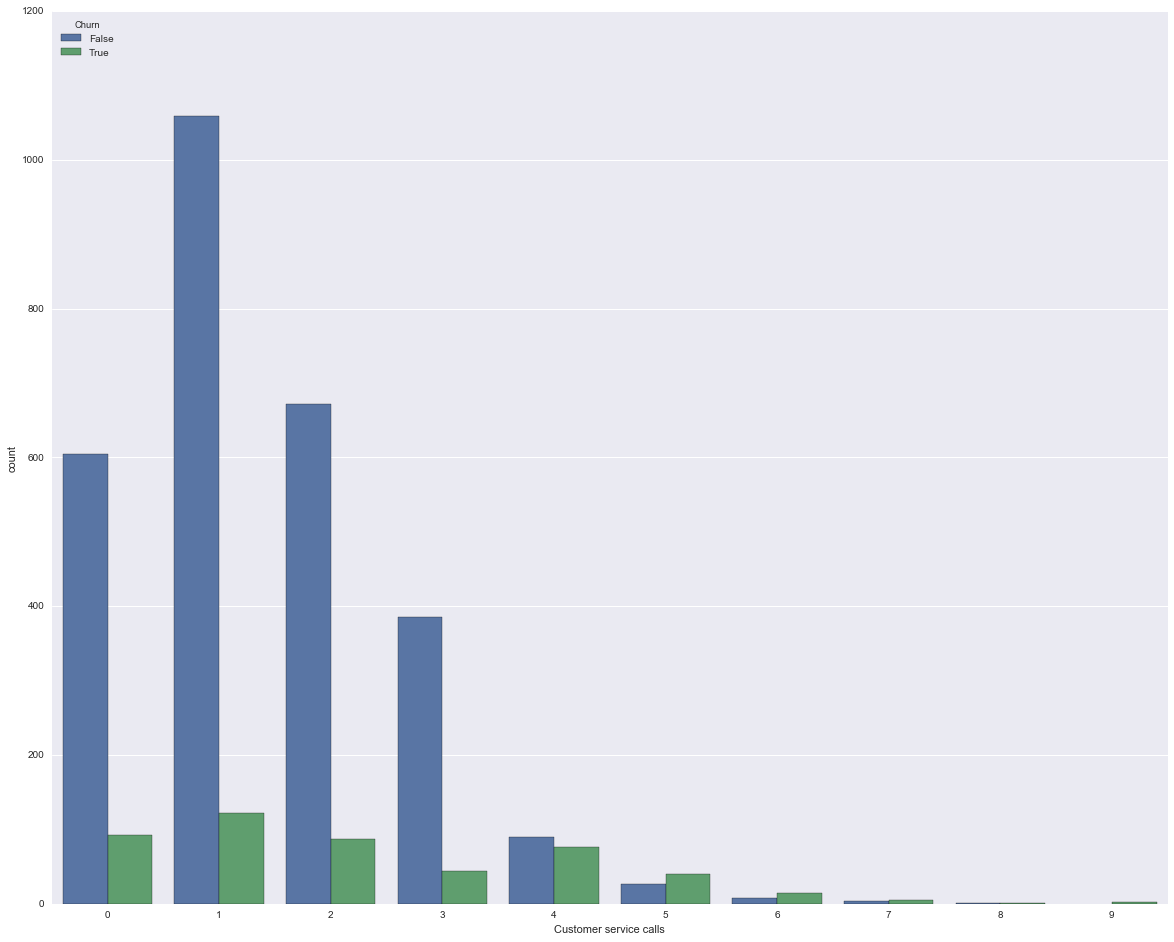

In [54]:
sns.countplot(data['Customer service calls'], hue=data['Churn'])

In [55]:
data['many calls'] = (data['Customer service calls'] > 3).astype('int')

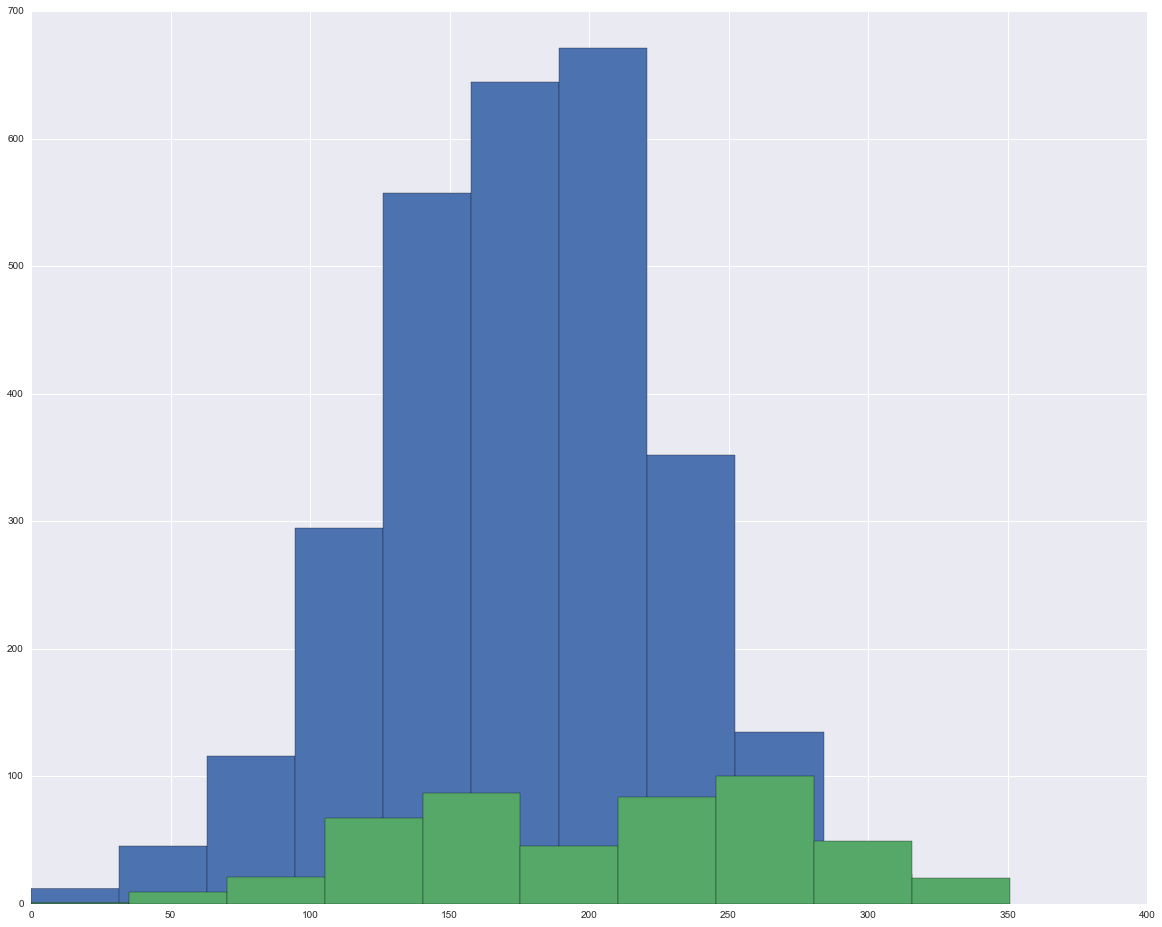

In [56]:
data[data['Churn'] == 0]['Total day minutes'].hist()
data[data['Churn'] == 1]['Total day minutes'].hist()

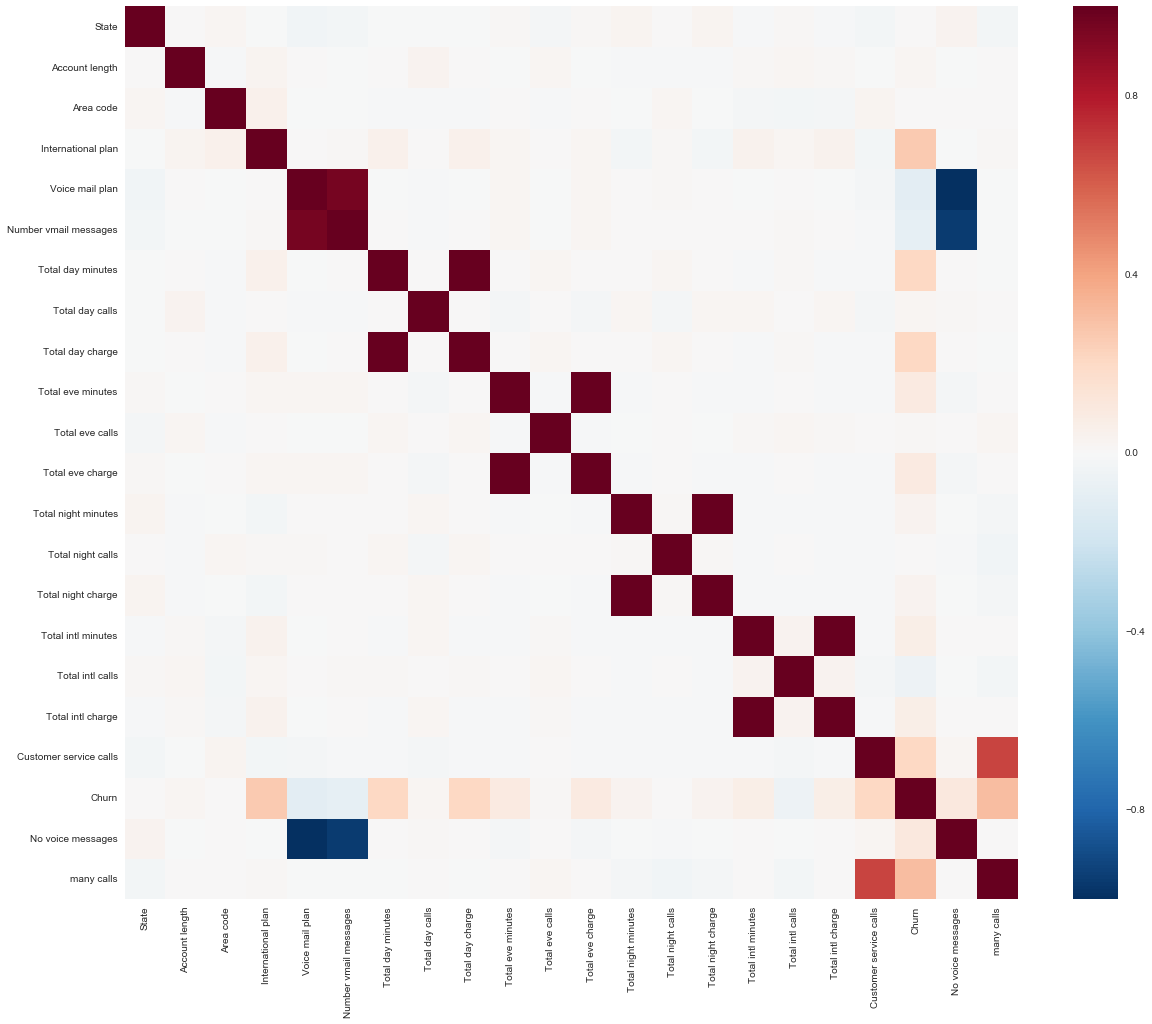

In [58]:
sns.heatmap(data.corr())

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop('Churn', 
                                       axis=1))

In [61]:
data_pca.shape

(3333, 2)

In [62]:
pca.explained_variance_ratio_

array([ 0.23150237,  0.19801182])

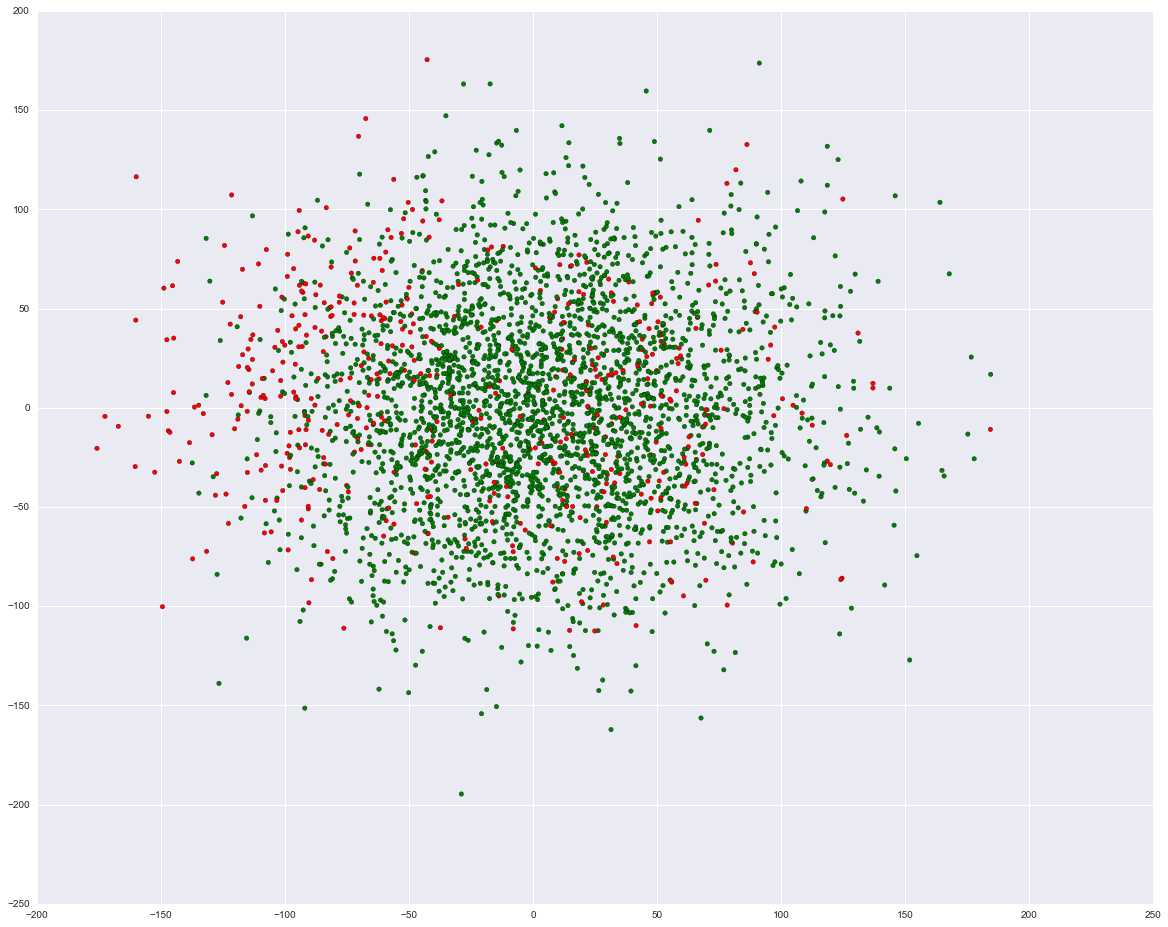

In [65]:
scatter(data_pca[:,0], data_pca[:,1], 
        c=data['Churn'].apply(lambda churn:
                              'red' if churn else 'green'))

In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=321)
data_tsne = tsne.fit_transform(data.drop('Churn',
                              axis=1))



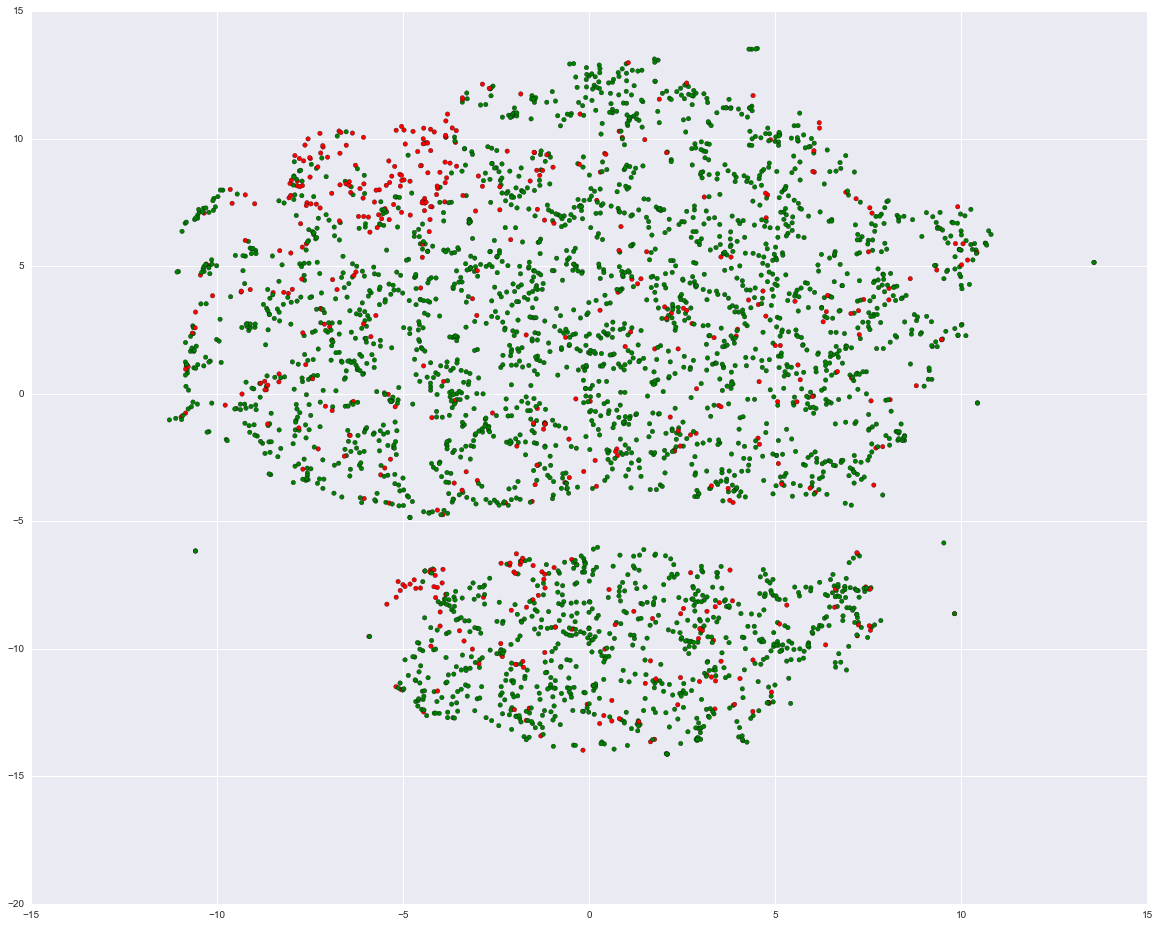

In [69]:
scatter(data_tsne[:,0], data_tsne[:,1], 
        c=data['Churn'].apply(lambda churn:
                              'red' 
                              if churn 
                              else 'green'))

In [71]:
def my_cv(clf, train_df, y_series, scoring=roc_auc_score,
          n_folds=3, 
          random_state=42, scale=False):
    
    scores = []
    folds = StratifiedKFold(y_series, n_folds=n_folds,
                           random_state=random_state)
    
    for train_idx, test_idx in folds:
        X_train = train_df.iloc[train_idx, :]
        X_valid = train_df.iloc[test_idx, :]
        y_train = y_series.iloc[train_idx]
        y_valid = y_series.iloc[test_idx]
        
        if scale:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_valid = scaler.transform(X_valid)
            
        clf.fit(X_train, y_train)
        
        scores.append(scoring(y_valid, 
                clf.predict_proba(X_valid)[:, 1]))
    return np.mean(scores)     

In [82]:
X_train_global, X_holdout, y_train_global, y_holdout = \
    train_test_split(data.drop('Churn', axis=1),
                data['Churn'], test_size=0.3)

In [75]:
X_train.shape, X_holdout.shape

((2333, 21), (1000, 21))

In [72]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=42,
                          n_jobs=-1)

In [76]:
my_cv(logit, X_train, y_train, scale=True)

0.85853395469007998

In [78]:
c_values = np.logspace(-4, 3, 10)

scores = []
for c_val in c_values:
    scores.append(my_cv(LogisticRegression(C=c_val,
                        random_state=42), 
                        X_train, y_train, scale=True))
    

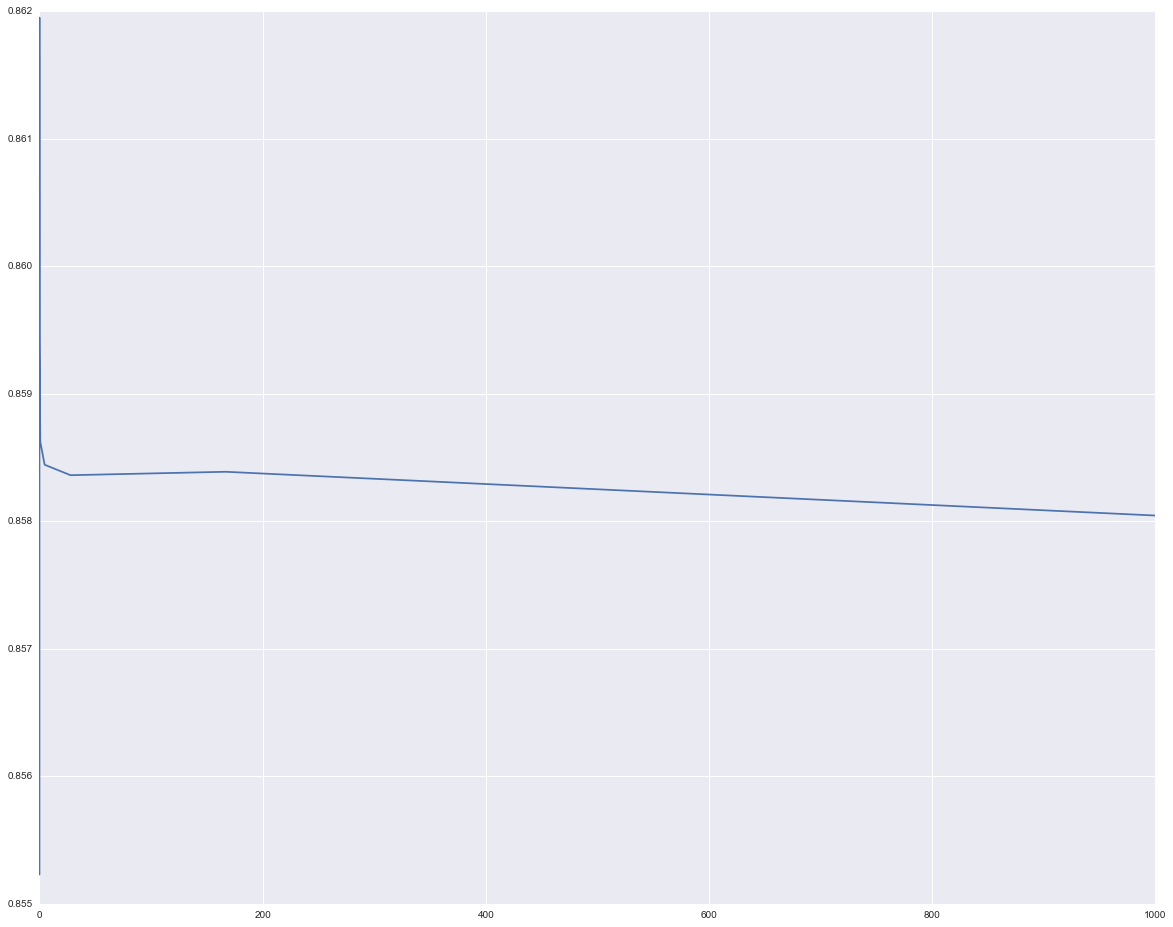

In [79]:
plot(c_values, scores)

In [81]:
max(scores), c_values[np.argmax(scores)]

(0.86194810130272703, 0.0035938136638046258)

In [83]:
logit = LogisticRegression(C=0.0036,
                          random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_global)
X_holdout_scaled = scaler.transform(X_holdout)

logit.fit(X_train_scaled, y_train_global)
roc_auc_score(y_holdout, 
              logit.predict_proba(X_holdout_scaled)[:, 1])

0.83144160390368094

In [84]:
logit = LogisticRegression(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_global)
X_holdout_scaled = scaler.transform(X_holdout)

logit.fit(X_train_scaled, y_train_global)
roc_auc_score(y_holdout, 
              logit.predict_proba(X_holdout_scaled)[:, 1])

0.83147424337622711